## Class Imbalance Problem - Observed Labels by Class

This script must be run from the same directory as the scripts which it imports.

In [1]:
%run preprocess.ipynb
%run sys_configs.ipynb

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

np.random.seed(123)

Map the activity labels to a text description of that activity.

In [2]:
counts = data["activity"].map(ACTIVITY_MAPPING).value_counts()[1:]
counts.head(5)

activity
Dumbbell Alternate Bicep Curl    18730
Front Dumbbell Raise             17457
Hammer Curl                      16160
Dumbbell Flyes                   15994
Incline Dumbbell Flyes           15655
Name: count, dtype: int64

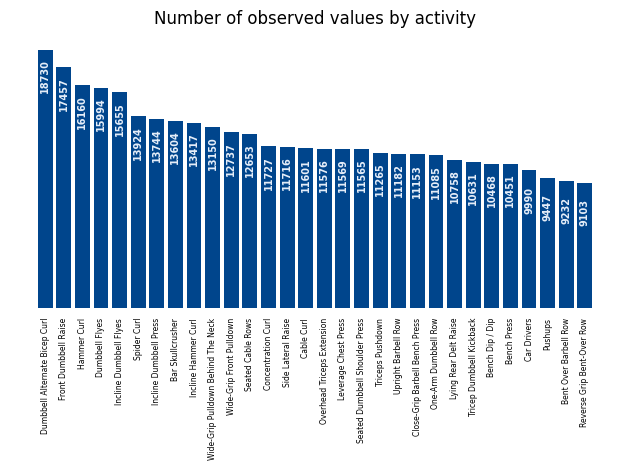

In [3]:
fig, ax = plt.subplots()

bars = ax.bar(
    x=counts.index,
    height=counts.values,
    color = scale_rgb(COLOURS.get("accent-blue-dark-2"))
)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(False)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

ax.set_ylim([0,20000])
ax.get_yaxis().set_visible(False)
bar_color = scale_rgb(COLOURS.get("accent-blue-pale"))

for bar in bars:
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() - 3000,
        round(bar.get_height(), 1),
        horizontalalignment='center',
        color=bar_color,
        weight='bold',
        fontsize=7,
        rotation = 90
    )
plt.xticks(rotation=90, size = 5.5)
plt.title("Number of observed values by activity")
fig.tight_layout()

plt.savefig('ObservedValuesByActivity.pdf', dpi = 1000, format = 'pdf', bbox_inches = 'tight')
plt.show()